<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/M4A_Py_ML_Arv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

This dataset seems suitable for exploring potential relationships between these factors and the likelihood of a fraudulent claim. For example, you might investigate if younger males with larger engines who haven't made a claim recently are more likely to file fraudulent claims.

* **age:** The age of the insurance policyholder.
* **is_male:** A binary indicator of the policyholder's gender (1 for male, 0 for not male).
* **engine_size:**  The size of the engine in the insured vehicle (the units are not specified but could be cubic centimeters or liters).
* **months_last_claim:** The number of months since the policyholder's last claim.
* **fraud:** A binary indicator of whether the claim was fraudulent (1 for fraudulent, 0 for not fraudulent).

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/car_insurance_fraud.csv')
df.head()

,age,is_male,engine_size,months_last_claim,fraud
0,71,0,120,24,1
1,40,0,70,12,1
2,78,0,200,12,0
3,31,1,120,6,1
4,32,1,120,12,0


A train-test split is a crucial technique in machine learning used to evaluate a model's performance on unseen data. The dataset is divided into two subsets: a training set for model training and a testing set for evaluation. This prevents overfitting, where the model becomes too specialized to the training data. By using a separate testing set, we obtain a more realistic assessment of the model's generalization ability. It's essential to ensure a random split, consider data distribution, and potentially use stratified sampling for imbalanced datasets. To further enhance reliability, multiple train-test splits can be performed, and the average performance can be calculate


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','is_male','engine_size','months_last_claim']],df['fraud'] ,test_size=0.20)
X_train.head(3)

,age,is_male,engine_size,months_last_claim
57,41,0,120,12
48,61,0,200,6
79,62,1,70,6


A decision tree classifier is a supervised learning algorithm that uses a tree-like structure to categorize data. It works by asking a series of questions about the data's features, represented by internal nodes in the tree, and following branches based on the answers until it reaches a leaf node, which represents a specific category. During training, the algorithm learns the optimal questions to ask at each node to best separate the data into distinct categories. This makes decision trees highly interpretable, as the decision-making process is easily visualized. They can handle both categorical and numerical data and require minimal data preprocessing. However, they are prone to overfitting, where the tree becomes too complex and performs poorly on new data, which can be addressed with techniques like pruning.

![](https://i0.wp.com/spotintelligence.com/wp-content/uploads/2024/05/decision-tree-example-1024x576.jpg?resize=1024%2C576&ssl=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train,y_train)
train_accuracy= tree.score(X_train,y_train)*100
train_accuracy

71.25

This decision tree provides a classification model to identify whether a case is `fraud` or `clean` based on the "age" of individuals. At the top level, the model splits at `age <= 46.0`, indicating that younger individuals are more likely to exhibit fraudulent behavior. For those aged 46 or younger, further analysis at `age <= 28.5` highlights a higher concentration of fraud cases, with two sub-groups confirming fraud as the majority outcome. On the other hand, for individuals older than 46, the model splits again at `age <= 83.5`, where most cases are identified as `clean`. However, within this group, a small segment of older individuals (age > 83.5) shows a higher likelihood of fraud. The tree highlights key age thresholds where fraud risks shift, enabling businesses to focus fraud detection efforts on younger individuals and certain subsets of older age groups, while reducing scrutiny on middle-aged customers where fraud risk is minimal.

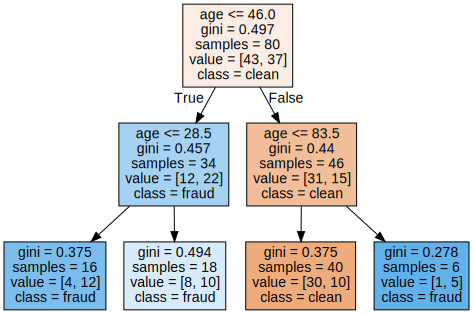

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
Source(export_graphviz(tree,filled=True,
                           feature_names= ['age','is_male','engine_size','months_last_claim'],
                           class_names=['clean','fraud']))

`preds = tree.predict(X_test)` uses a trained decision tree model (tree) to generate predictions (preds) on a set of test data (X_test).

In [ ]:
preds = tree.predict(X_test)
preds

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

 We can calculate accuracy by dividing the number of correct predictions by the total number of predictions.

In [ ]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test,preds)*100
test_accuracy

65.0

A confusion matrix is a table that summarizes the performance of a classification model on a set of test data. It shows how many times the model correctly predicted each class and how many times it made incorrect predictions.

[[9 2]
 [6 3]]


<Axes: >

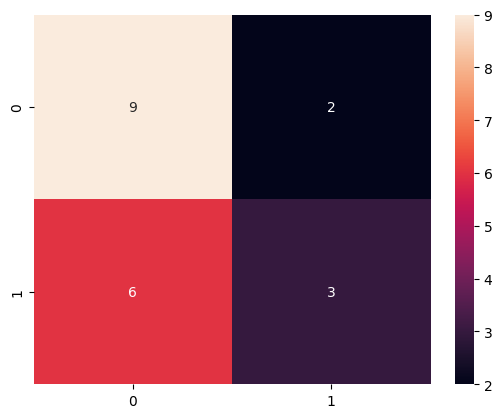

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")

Precision and recall are two important metrics used to evaluate the performance of a classification model. They are particularly useful when dealing with imbalanced datasets.

- Precision measures the proportion of positive identifications that were actually correct. In other words, it tells us how accurate the positive predictions are.

- Recall measures the proportion of actual positive cases that were correctly identified. It tells us how well the model finds all the relevant cases.



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.60      0.82      0.69        11
           1       0.60      0.33      0.43         9

    accuracy                           0.60        20
   macro avg       0.60      0.58      0.56        20
weighted avg       0.60      0.60      0.57        20



# Activity: Decision Tree

Build a machine learning model to predict insurance claims. Explore and clean the dataset, handle missing values and outliers. Prepare the data by encoding categorical features and splitting it into training and testing sets. Choose a suitable classification algorithm (**Decision Tree**) and train it on the training data. Evaluate the model's performance on the testing data using metrics like accuracy, precision, and recall. Submit a report summarizing your approach, data preprocessing, model selection, evaluation, and insights, along with the trained model and code.  

data: `https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/activities/fraud%20-%20easy.csv`


This dataset about insurance claims, potentially in the context of fraud detection. Here's a breakdown of the likely meaning of each column:

* `WeekOfMonth`: The week of the month in which the accident occurred.
* `WeekOfMonthClaimed`: The week of the month in which the claim was made.
* `Age`: The age of the policyholder.
* `PolicyNumber`: The unique identifier for the insurance policy.
* `RepNumber`: The representative number.
* `Deductible`: The deductible amount on the insurance policy.
* `DriverRating`: The driver's rating.
* `PoliceReportFiled`: Whether a police report was filed for the accident.
* `WitnessPresent`: Whether there were any witnesses present at the accident.
* `Year`: The year in which the accident occurred.
* `FraudFound_P`: Whether fraud was found in the claim.



```
The decision tree flags fraud (blue nodes) based on combinations of features, primarily:

*   **Low Deductible (<= 450):** This is a key starting point for many fraud predictions.
*   **Representative Number (RepNumber):** Certain representatives (e.g., RepNumber <= 12.5 in one branch) are associated with more fraudulent claims.
*   **Age:** Younger ages (e.g., Age <= 46.5 in one path) combined with other factors increase fraud suspicion.

Essentially, the tree identifies patterns where low deductibles, certain representatives, and younger policyholders are more likely to be linked to fraud.

```

